In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
netflix = pd.read_csv("netflix_titles.csv")
netflix['date_added'] = pd.to_datetime(netflix['date_added'])

FileNotFoundError: [Errno 2] No such file or directory: 'netflix_titles.csv'

In [ ]:
netflix.info()

In [ ]:
netflix.head()

In [ ]:
netflix.isnull().sum()

In [3]:
netflix['year_added'] = netflix["date_added"].dt.year

NameError: name 'netflix' is not defined

In [4]:
years_count = pd.crosstab(netflix["year_added"], columns='count')
years_count

NameError: name 'netflix' is not defined

NameError: name 'netflix' is not defined

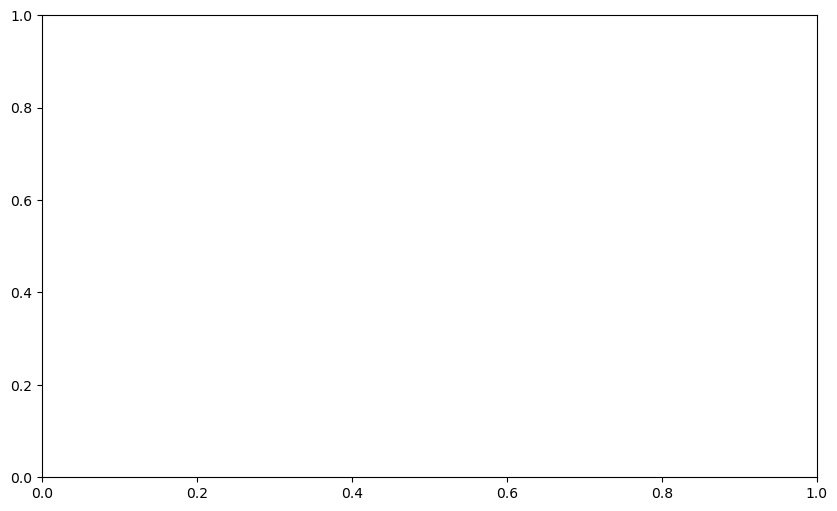

In [5]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(sorted(netflix[netflix['year_added'].notna()]['year_added'].unique()), years_count['count'])
ax.set_title("Number of New Additions by Year")
ax.set_xlabel("Year")
ax.set_ylabel("Count")
plt.show()

In [6]:
len(netflix["country"].unique())

NameError: name 'netflix' is not defined

In [7]:
netflix["country"].head(10)

NameError: name 'netflix' is not defined

In [8]:
netflix['country_list'] = netflix['country'].apply(lambda x: x.split(', ') if pd.notna(x) else [])

NameError: name 'netflix' is not defined

In [9]:
netflix["country_list"].head(10)

NameError: name 'netflix' is not defined

In [41]:
np.mean([len(s) for s in netflix["country_list"]])

1.1370500738049278

In [47]:
all_countries = []
for i in range(0, len(netflix['country_list'])):
    all_countries += netflix['country_list'][i]
all_countries = pd.Series(all_countries)

In [51]:
countries_count = all_countries.value_counts().reset_index()
countries_count.columns = ['Country', 'Count']

In [52]:
countries_count

,Country,Count
0,United States,3689
1,India,1046
2,United Kingdom,804
3,Canada,445
4,France,393
...,...,...
122,Bermuda,1
123,Ecuador,1
124,Armenia,1
125,Mongolia,1


In [53]:
top_10_countries = countries_count.head(10)

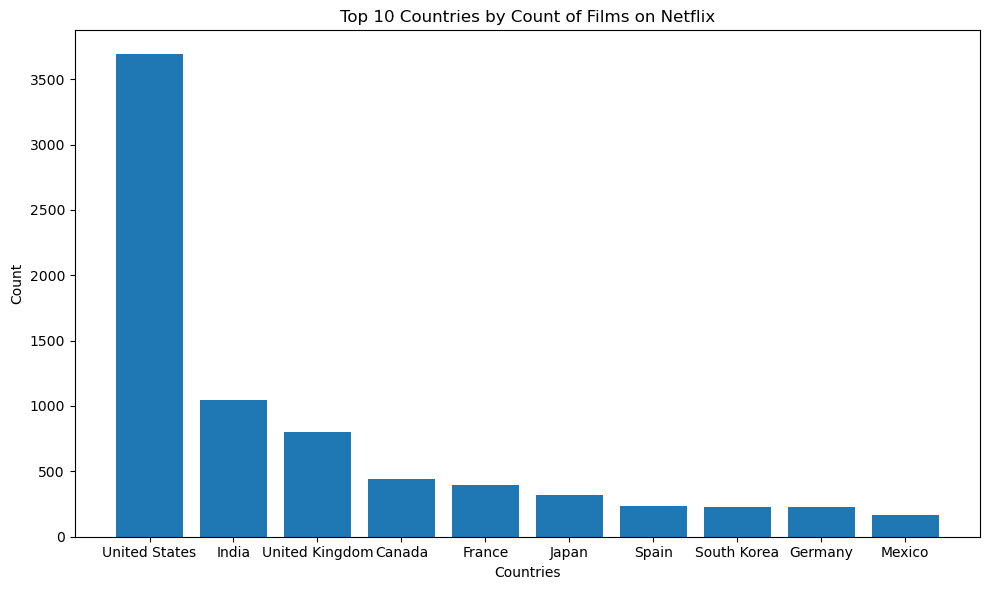

In [57]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(top_10_countries['Country'], top_10_countries['Count'])
ax.set_title("Top 10 Countries by Count of Films on Netflix")
ax.set_ylabel("Count")
ax.set_xlabel("Countries")
plt.tight_layout()
plt.show()

In [60]:
type_count = pd.crosstab(netflix['type'], columns = 'count')
type_count['percent'] = type_count['count']/len(netflix)

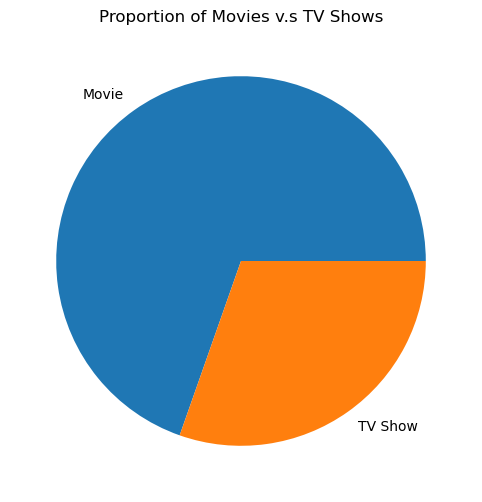

In [64]:
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(type_count['percent'], labels=netflix['type'].unique())
ax.set_title("Proportion of Movies v.s TV Shows")
plt.show()